In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading datasets

df = pd.read_csv('car_price_prediction_.csv')
df

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [3]:
df.shape

(2500, 10)

In [4]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [6]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [7]:
#checking null values

df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [8]:
#checking duplicated values

df.duplicated().sum()

np.int64(0)

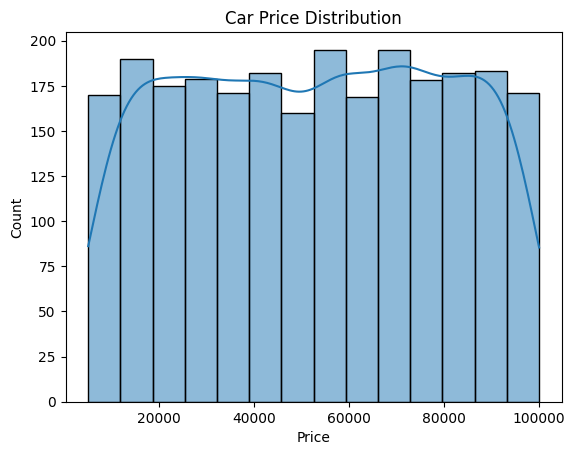

In [10]:
#Price Distribution
sns.histplot(df['Price'], kde=True)
plt.title("Car Price Distribution")
plt.show()


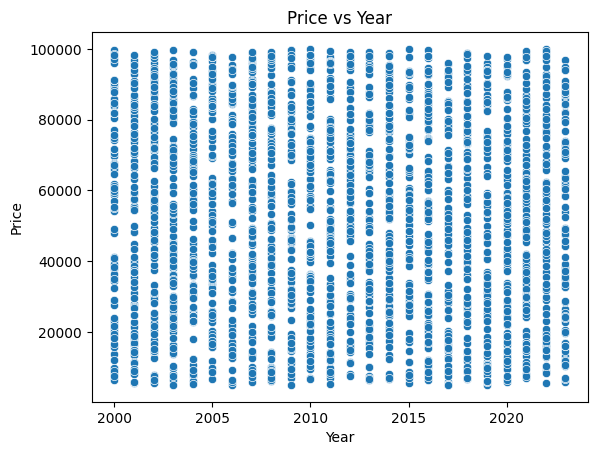

In [11]:
#Price Vs Year

sns.scatterplot(x='Year', y='Price', data=df)
plt.title("Price vs Year")
plt.show()


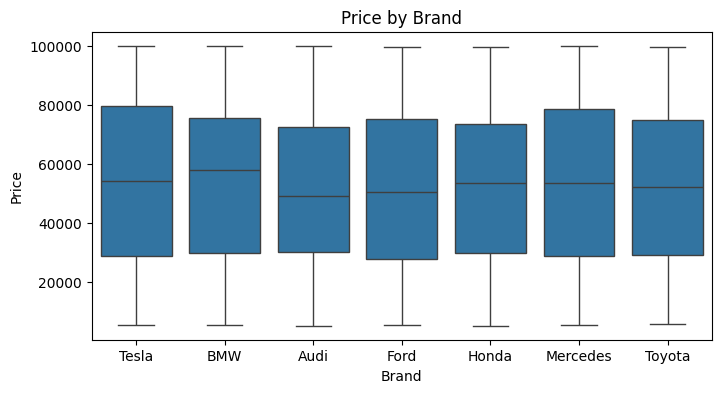

In [12]:
#Price by Brand
plt.figure(figsize=(8,4))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title("Price by Brand")
plt.show()


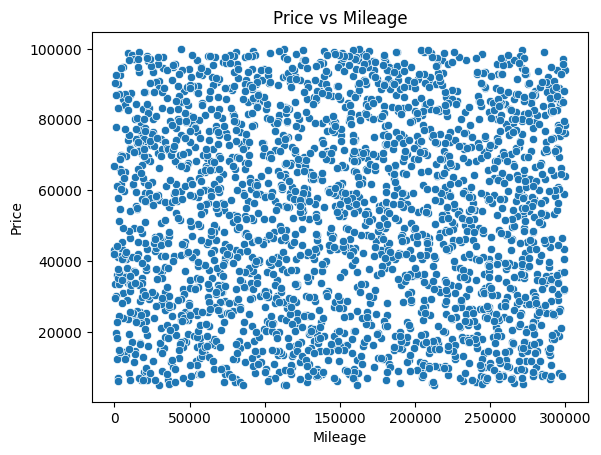

In [13]:
#Price By Mileage

sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title("Price vs Mileage")
plt.show()


In [14]:
#Feature Engineering
df['Car_Age'] = 2024 - df['Year']
df.drop('Year', axis=1, inplace=True)

In [15]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#Model Training
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [ ]:
#Model Evaluation

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


y_pred = rf.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: -0.044190948088275395
MAE: 24301.608518
RMSE: 28125.26146127312


In [ ]:
#Feature Importance

import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


Mileage                0.201745
Car ID                 0.183695
Engine Size            0.147199
Car_Age                0.112687
Transmission_Manual    0.020901
Condition_Used         0.018437
Fuel Type_Electric     0.017536
Fuel Type_Petrol       0.017434
Condition_New          0.017203
Fuel Type_Hybrid       0.016330
dtype: float64

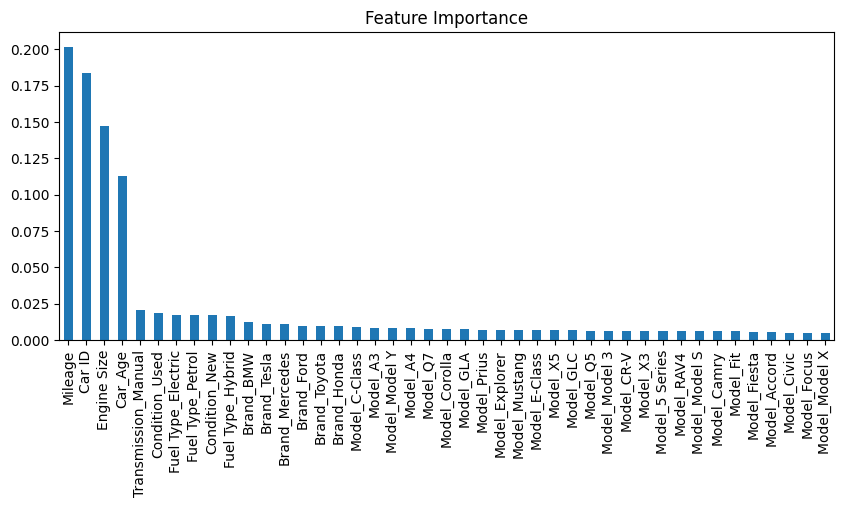

In [20]:
feature_importance.plot(kind='bar', figsize=(10,4))
plt.title("Feature Importance")
plt.show()
